<a href="https://colab.research.google.com/github/RaoMasood1/Heart_Disease_Prediction_with_preprocessing1/blob/main/Heart_Disease_Prediction_with_preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report


In [2]:
import pandas as pd # Data Processing
import numpy as np
df= pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
827,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
857,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.shape

(1025, 14)

In [11]:
df.ndim

2

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df.target.nunique()

2

In [14]:
df.target.unique()

array([0, 1])

In [15]:
df["target"].unique()

array([0, 1])

In [16]:
df["sex"].unique()

array([1, 0])

In [17]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [18]:
df.target.value_counts(True)

1    0.513171
0    0.486829
Name: target, dtype: float64

In [19]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [20]:
df["target"].sample(20)

531    1
791    0
670    0
499    1
586    0
854    0
709    0
704    1
224    1
507    1
147    0
187    0
703    1
72     0
916    0
500    1
752    1
599    1
826    1
660    0
Name: target, dtype: int64

In [21]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Heart Disease Prediction')

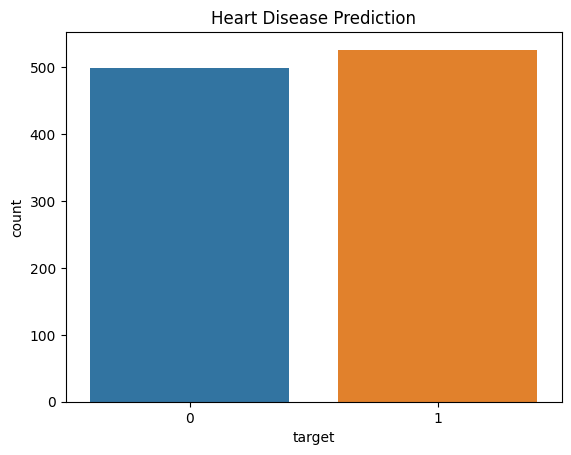

In [22]:
# Show Number of Patient by Stroke
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df , x='target')
plt.title('Heart Disease Prediction')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
df.sample(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
656,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
576,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
938,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
168,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
148,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
355,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
876,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0


In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [27]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
print('Missing data sum :')
print(df.isnull().sum())

print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)

Missing data sum :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing data percentage (%):
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [31]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [32]:
cd = pd.DataFrame(cat_features)
cd.head()

""


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [34]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [37]:
print('*'*10)

**********


In [38]:
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [39]:
cat_features

[]

In [40]:
df.sex.duplicated()

0       False
1        True
2        True
3        True
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Name: sex, Length: 1025, dtype: bool

In [41]:
df.duplicated().sum()

723

In [42]:
df['sex'].unique()


array([1, 0])

In [43]:
df['sex'].nunique()

2

In [44]:
df['age'].unique()


array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [45]:
df['age'].nunique()

41

In [46]:
df['cp'].unique()


array([0, 1, 2, 3])

In [47]:
df['cp'].nunique()

4

In [48]:
df['trestbps'].unique()


array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

In [49]:
df['trestbps'].nunique()

49

In [50]:
df['chol'].unique()


array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

In [51]:
df['chol'].nunique()

152

In [52]:
df['fbs'].unique()


array([0, 1])

In [53]:
df['fbs'].nunique()

2

In [54]:
df['restecg'].unique()


array([1, 0, 2])

In [55]:
df['restecg'].nunique()

3

In [56]:
df['thalach'].unique()


array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

In [57]:
df['thalach'].nunique()

91

In [58]:
df['exang'].unique()


array([0, 1])

In [59]:
df['exang'].nunique()

2

In [60]:
df['oldpeak'].unique()


array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [61]:
df['oldpeak'].nunique()

40

In [62]:
df['slope'].unique()


array([2, 0, 1])

In [63]:
df['slope'].nunique()

3

In [64]:
df['ca'].unique()


array([2, 0, 1, 3, 4])

In [65]:
df['ca'].nunique()

5

In [66]:
df['thal'].unique()


array([3, 2, 1, 0])

In [67]:
df['thal'].nunique()

4

[Text(0.5, 1.0, 'Correlation Matrix')]

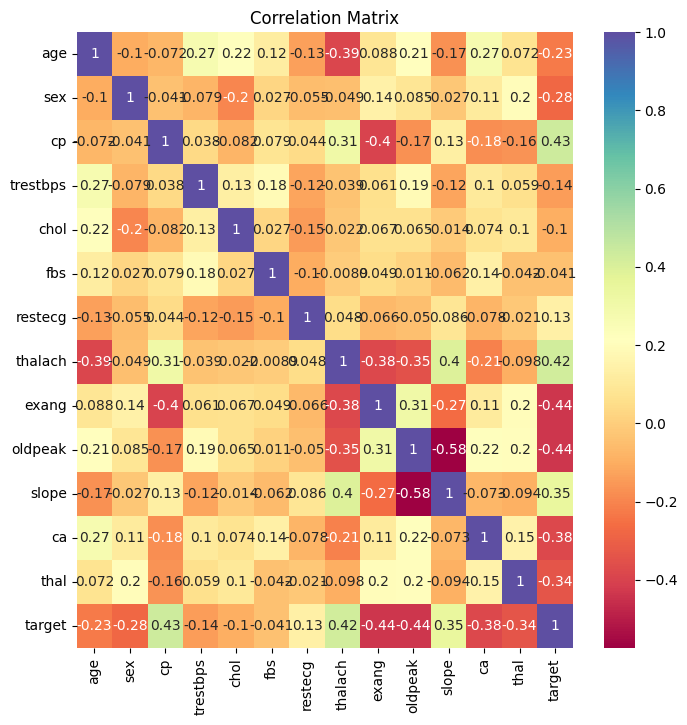

In [68]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<Axes: >

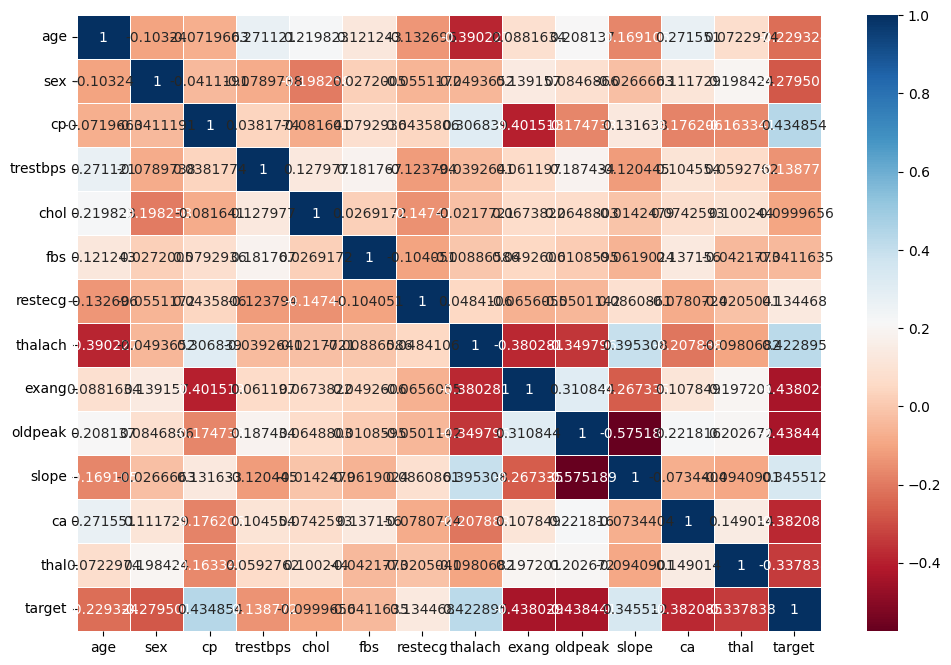

In [69]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")


In [70]:
corr_matrix = df.corr().round(2)
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


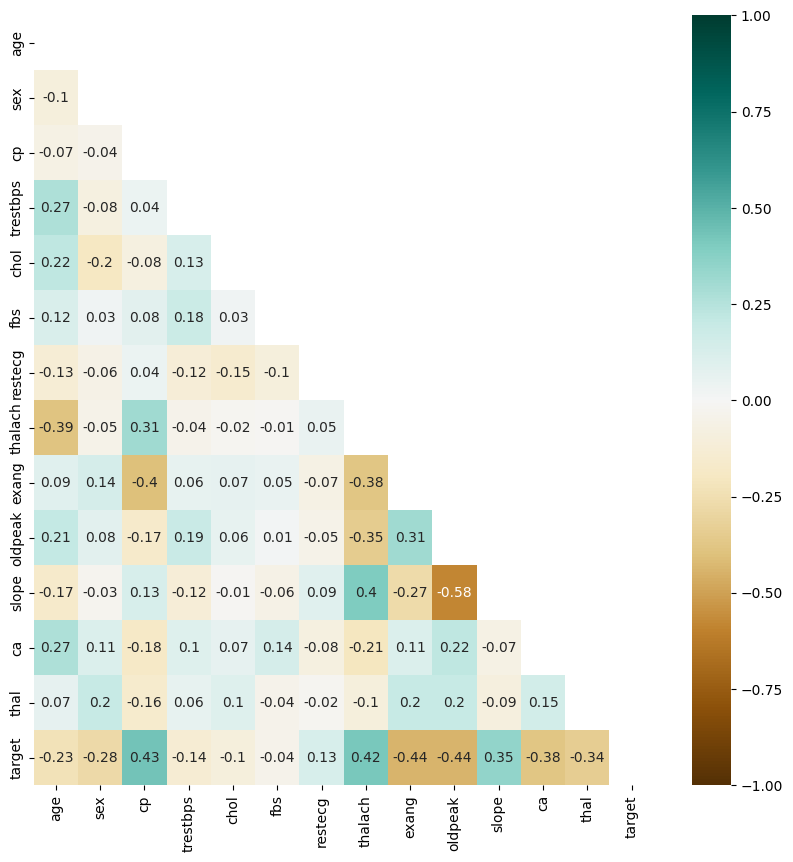

In [71]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [72]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [73]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [74]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='target',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

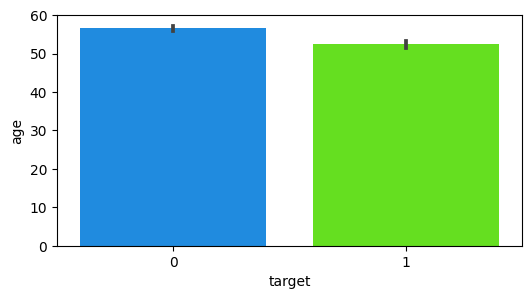

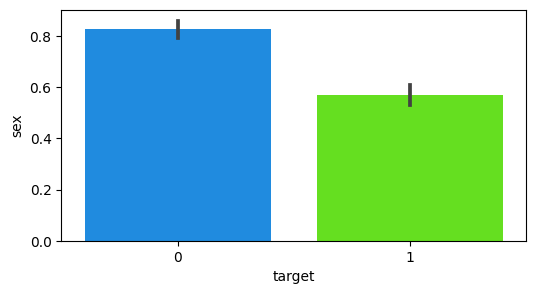

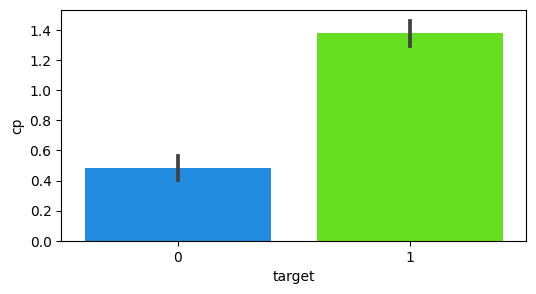

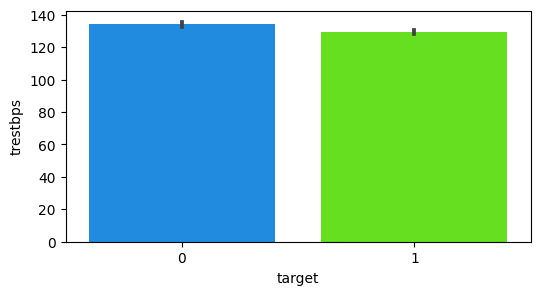

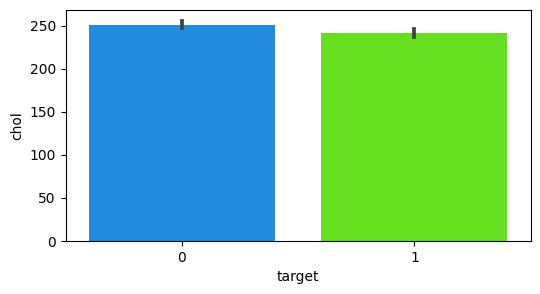

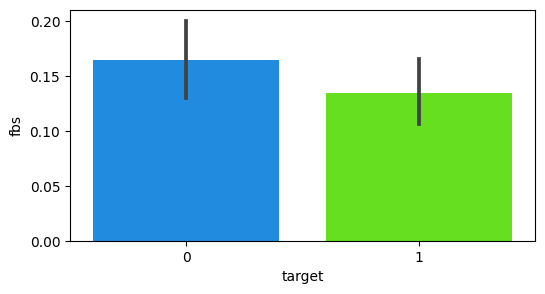

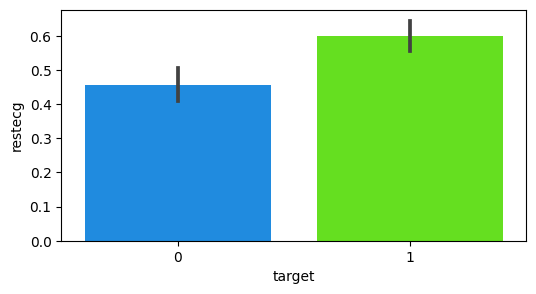

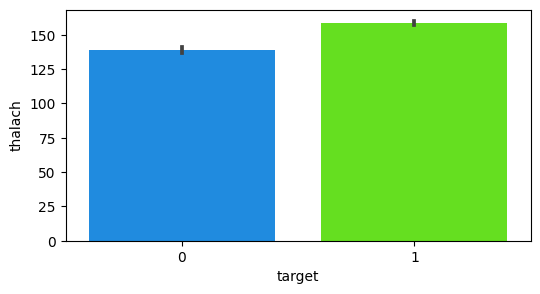

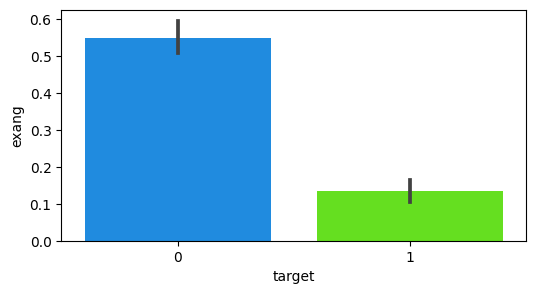

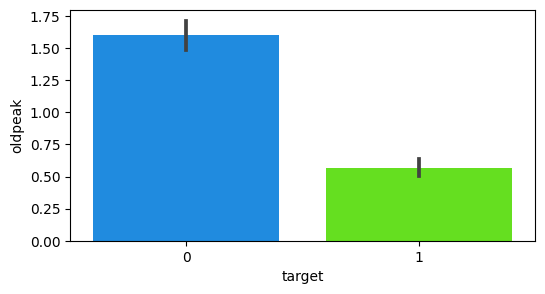

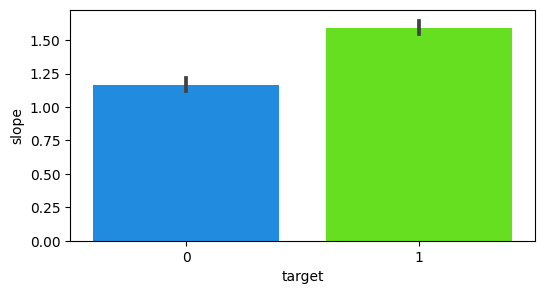

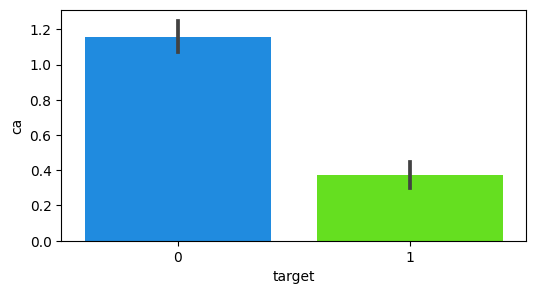

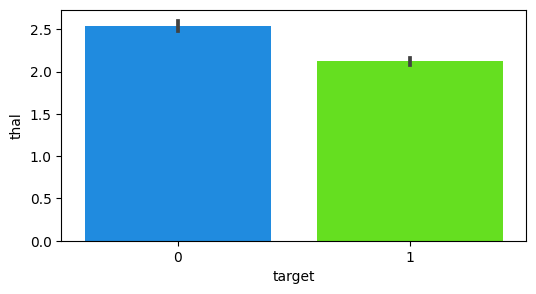

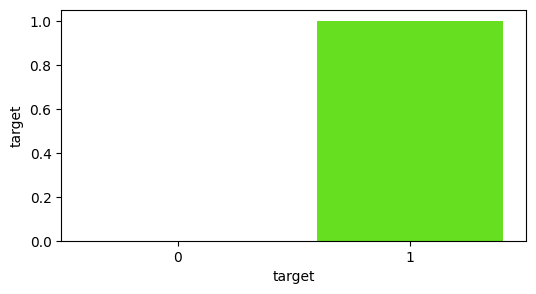

In [75]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='target',y=col,palette='gist_rainbow_r')

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [77]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
df["chol"]=df["chol"].fillna(df["chol"].mean())

In [79]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [80]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [81]:
df.shape

(1025, 14)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [83]:
train_data_cat = df.select_dtypes("object")
train_data_num = df.select_dtypes("number")

In [84]:
train_data_cat.head(3)

""
0
1
2


In [85]:
train_data_num.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [86]:
y = df['target']
x = df.drop('target', axis = 1)

In [87]:
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [88]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [89]:
x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [90]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((717, 13), (308, 13))

In [92]:
accuracy = {}

0.8376623376623377
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       141
           1       0.85      0.86      0.85       167

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



,Actual,Y test predicted
822,0,0
603,1,1
46,1,1
885,0,0
271,1,1
179,0,0
716,0,0
570,1,1
308,0,1
761,1,1


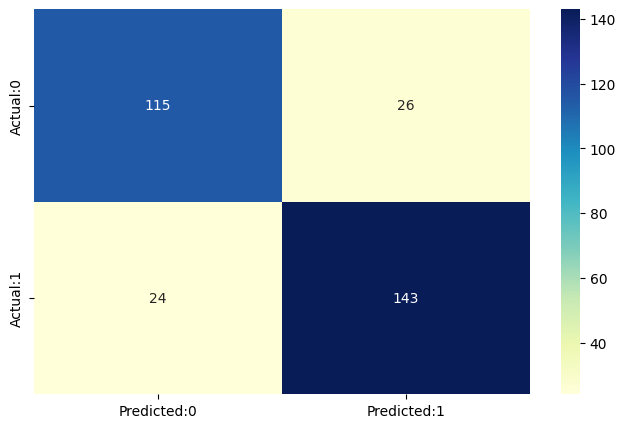

In [93]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression(max_iter=200)
model_logistic.fit(X_train,y_train)

y_pred_logis = model_logistic.predict(X_test)
print(accuracy_score(y_test, y_pred_logis))
logistic_acc = accuracy_score(y_test, y_pred_logis)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_logis)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_logis))

y_pred_test = model_logistic.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=200, max_iter=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Info] Number of positive: 359, number of negative: 358
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500697 -> initscore=0.002789
[LightGBM] [Info] Start training from score 0.002789
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Actual,Y test predicted
204,1,1
25,0,0
411,0,0
284,0,0
299,1,1
578,1,1
585,1,1
702,1,1
466,1,1
833,0,0


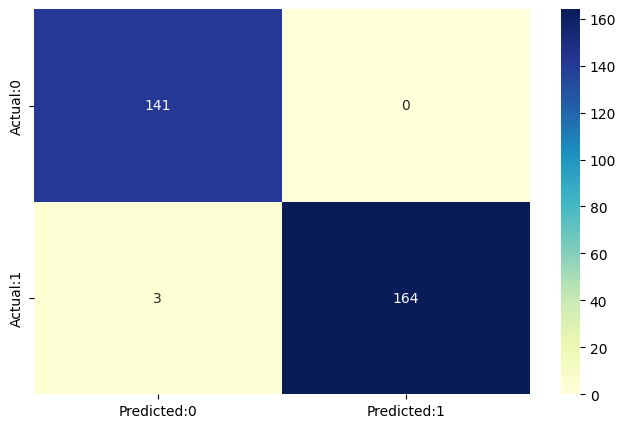

In [94]:
#LightGBM
import lightgbm as lgb
model_gbm= lgb.LGBMClassifier(max_iter=200)
model_gbm.fit(X_train,y_train)

y_pred_gbm = model_gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_gbm))
gbm_accu = accuracy_score(y_test, y_pred_gbm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbm))

y_pred_test = model_gbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.974025974025974
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       141
           1       0.99      0.96      0.98       167

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



,Actual,Y test predicted
982,1,1
63,1,1
417,1,1
650,0,0
952,1,1
719,1,1
127,1,1
790,0,0
510,1,1
270,1,0


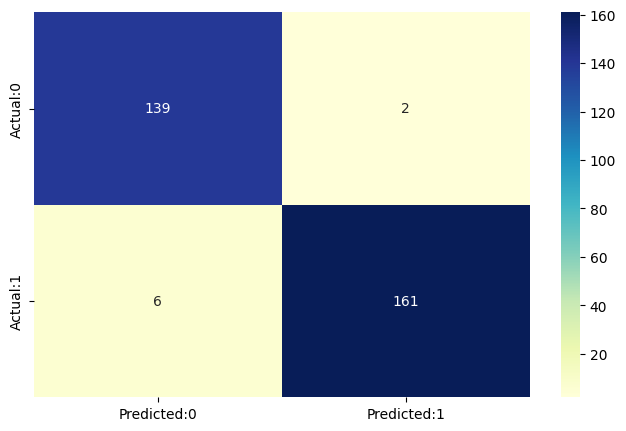

In [95]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)

y_pred_gbc = model_gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))
gbc_accu = accuracy_score(y_test, y_pred_gbc)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbc)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbc))

y_pred_test = model_gbc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.9902597402597403
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.98      0.99       167

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



,Actual,Y test predicted
706,0,0
489,1,1
108,0,0
509,0,0
619,0,0
148,1,1
38,1,1
15,1,1
360,1,1
729,1,1


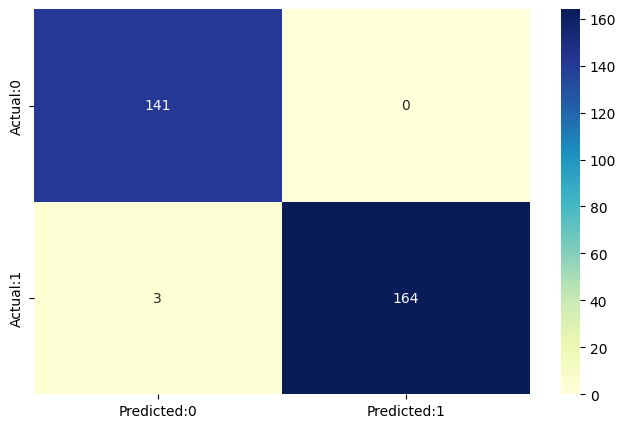

In [96]:
#XGBoost
from xgboost import XGBClassifier
model_xg= XGBClassifier()
model_xg.fit(X_train,y_train)

y_pred_xg = model_xg.predict(X_test)
print(accuracy_score(y_test, y_pred_xg))
xg_accu = accuracy_score(y_test, y_pred_xg)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_xg)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_xg))

y_pred_test = model_xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.9902597402597403
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.98      0.99       167

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



,Actual,Y test predicted
890,0,0
761,1,1
928,0,0
610,0,0
166,0,0
547,1,1
127,1,1
142,0,0
316,1,1
508,0,0


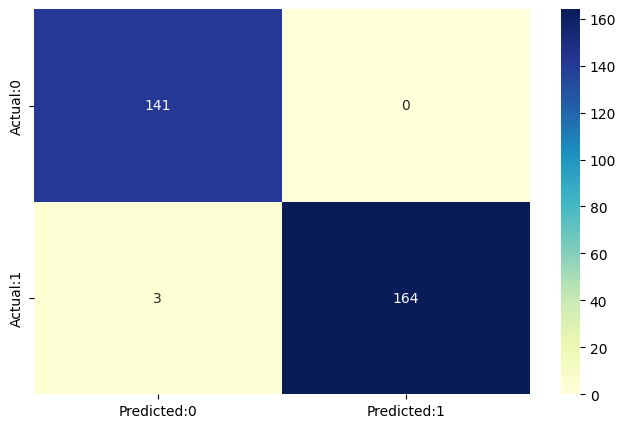

In [97]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_Random= RandomForestClassifier()
model_Random.fit(X_train,y_train)

y_pred_Random= model_Random.predict(X_test)
print(accuracy_score(y_test, y_pred_Random))
rf_accu = accuracy_score(y_test, y_pred_Random)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_Random)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_Random))

y_pred_test = model_Random.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.9902597402597403
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.98      0.99       167

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



,Actual,Y test predicted
821,0,0
972,1,1
656,0,0
362,1,1
748,1,1
74,0,0
995,1,1
938,1,1
596,1,1
534,1,1


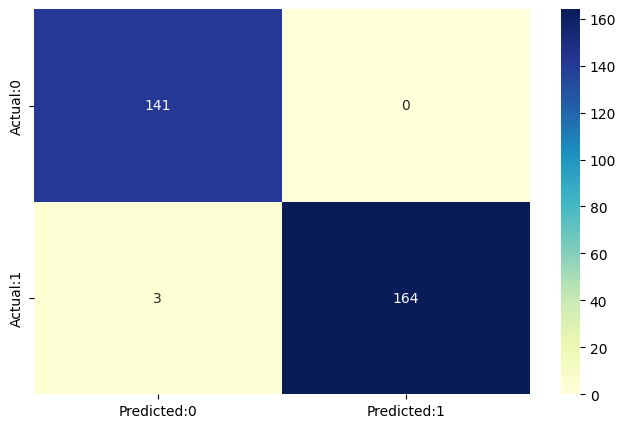

In [98]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

y_pred_tree= model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
tree_accu = accuracy_score(y_test, y_pred_tree)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_tree)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_tree))

y_pred_test = model_tree.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.8246753246753247
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       141
           1       0.86      0.81      0.83       167

    accuracy                           0.82       308
   macro avg       0.82      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308



,Actual,Y test predicted
586,0,0
957,0,0
725,0,0
294,0,0
723,1,1
1009,0,1
367,0,0
653,0,0
324,1,1
63,1,1


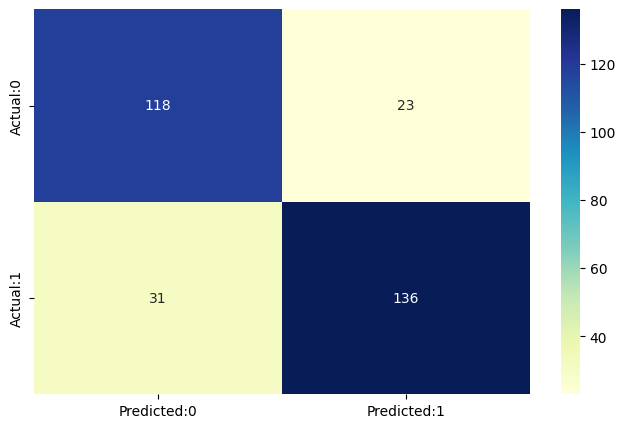

In [99]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)

y_pred_knn= model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
knn_accu = accuracy_score(y_test, y_pred_knn)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_knn)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_knn))

y_pred_test = model_knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.9318181818181818
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       141
           1       0.95      0.92      0.94       167

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



,Actual,Y test predicted
675,0,0
351,0,0
480,0,0
570,1,1
1003,1,0
780,0,0
43,0,0
284,0,0
472,1,1
791,0,0


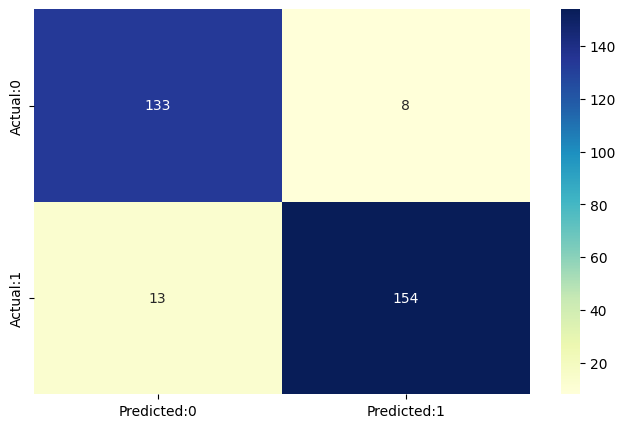

In [100]:
#SVM
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)

y_pred_svm= model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))
svm_accu = accuracy_score(y_test, y_pred_svm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_svm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_svm))

y_pred_test = model_svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

In [101]:
accuracy

{}

#Resultanat Graph Without SMOTE

Text(0, 0.5, 'Accuracy')

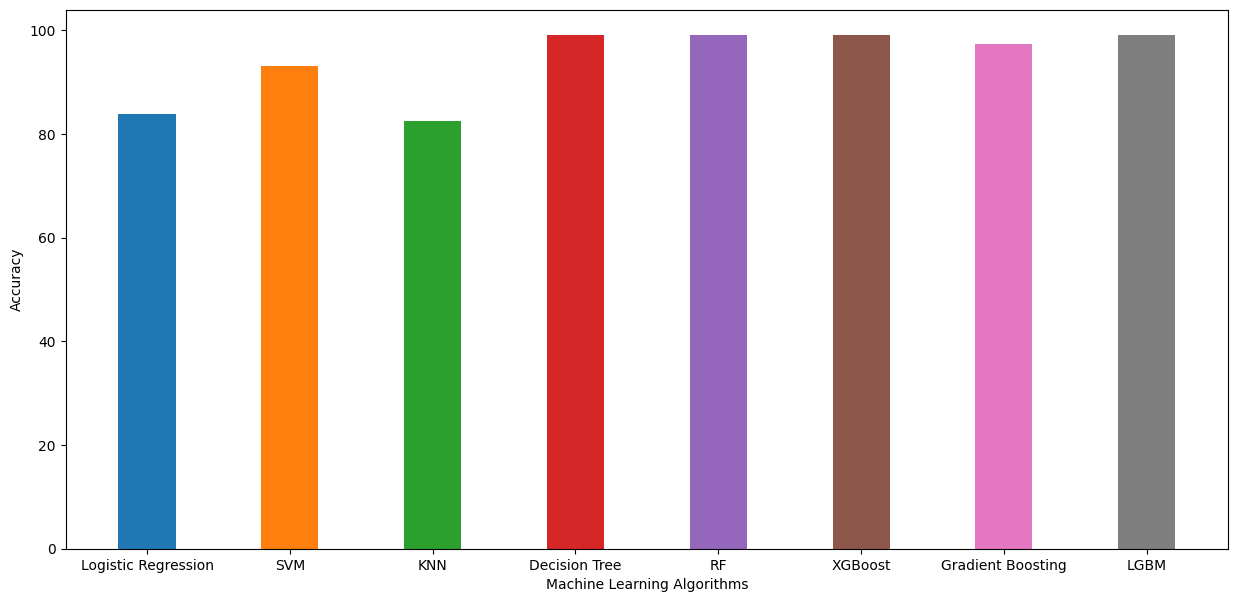

In [102]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')

#**Handling this data using SMOTE**

In [103]:
from imblearn.over_sampling import SMOTE


In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

print(y1.value_counts())


0    526
1    526
Name: target, dtype: int64


In [105]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = 'True',random_state = 3)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(736, 13)
(316, 13)
(736,)
(316,)


0.8322784810126582
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       152
           1       0.82      0.87      0.84       164

    accuracy                           0.83       316
   macro avg       0.83      0.83      0.83       316
weighted avg       0.83      0.83      0.83       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


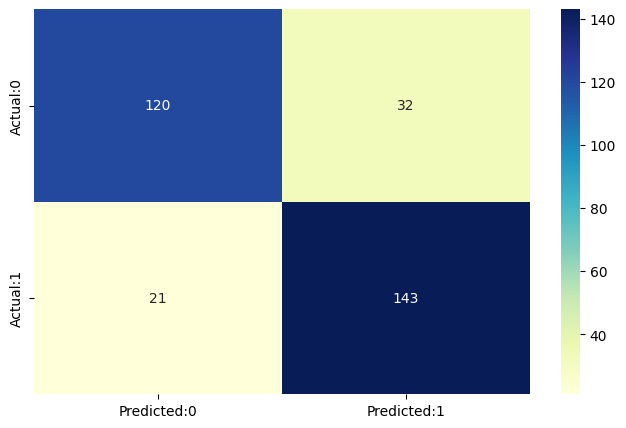

In [107]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
logis_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.9018987341772152
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       152
           1       0.89      0.93      0.91       164

    accuracy                           0.90       316
   macro avg       0.90      0.90      0.90       316
weighted avg       0.90      0.90      0.90       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


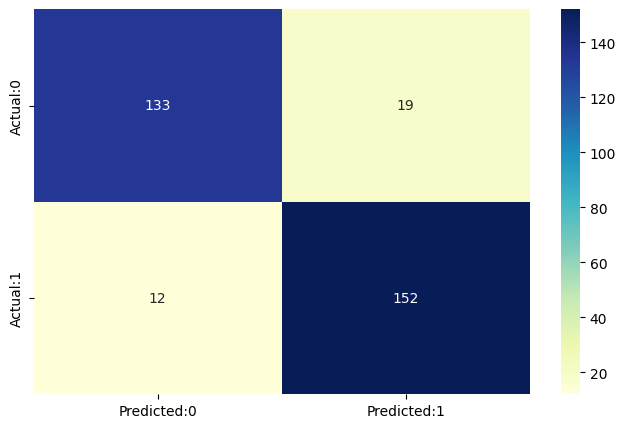

In [108]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
svm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8544303797468354
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       152
           1       0.84      0.90      0.86       164

    accuracy                           0.85       316
   macro avg       0.86      0.85      0.85       316
weighted avg       0.86      0.85      0.85       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


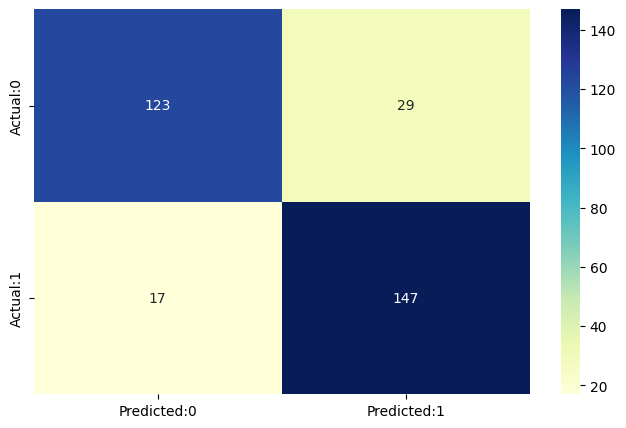

In [109]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred1))
knn_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.990506329113924
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       152
           1       1.00      0.98      0.99       164

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


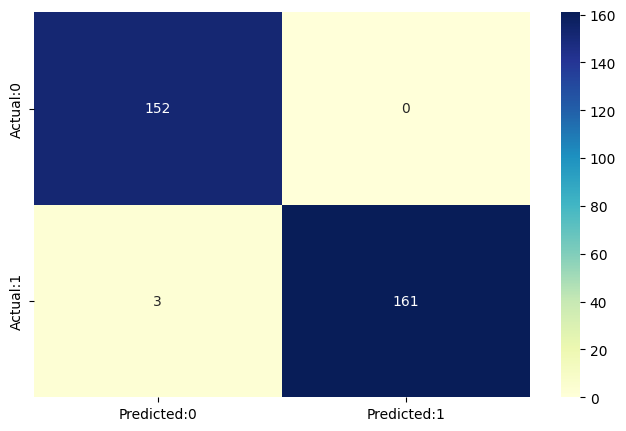

In [110]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(accuracy_score(y_test, y_pred1))
dt_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = dt.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.990506329113924
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       152
           1       1.00      0.98      0.99       164

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


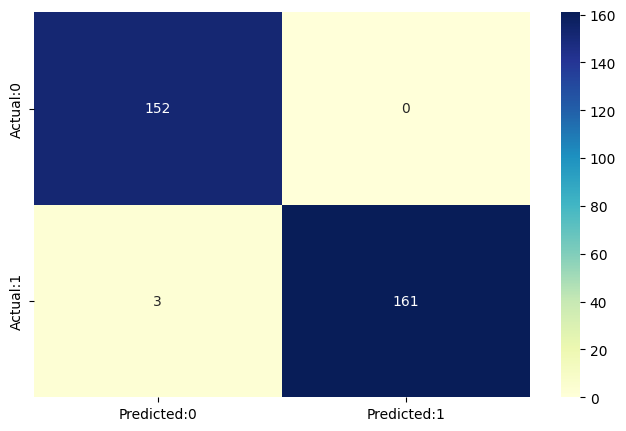

In [111]:
rf= DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred1))
rf_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = rf.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.9810126582278481
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       152
           1       1.00      0.96      0.98       164

    accuracy                           0.98       316
   macro avg       0.98      0.98      0.98       316
weighted avg       0.98      0.98      0.98       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


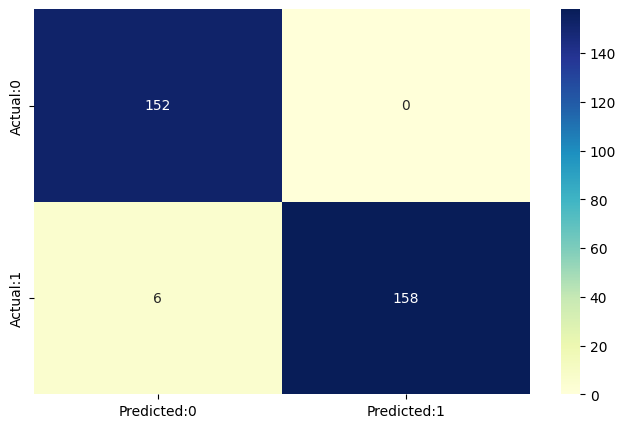

In [112]:
xg= XGBClassifier()
xg.fit(X_train, y_train)
y_pred1 = xg.predict(X_test)
print(accuracy_score(y_test, y_pred1))
xg_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.9556962025316456
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       152
           1       0.97      0.95      0.96       164

    accuracy                           0.96       316
   macro avg       0.96      0.96      0.96       316
weighted avg       0.96      0.96      0.96       316



,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


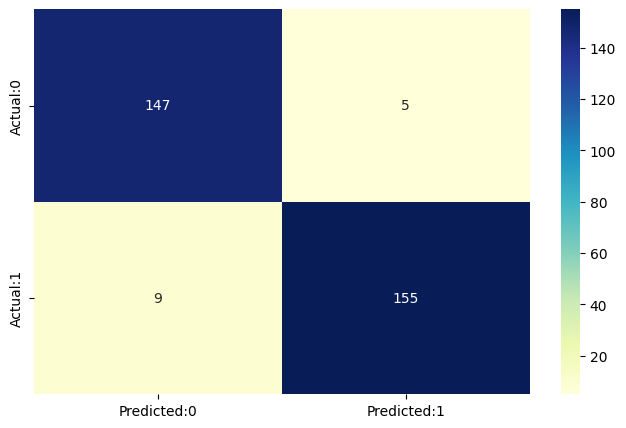

In [113]:
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
gb_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = gb.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

[LightGBM] [Info] Number of positive: 362, number of negative: 374
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491848 -> initscore=-0.032612
[LightGBM] [Info] Start training from score -0.032612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Actual,Y test predicted
232,0,0
360,1,1
180,0,0
1010,0,0
301,1,1


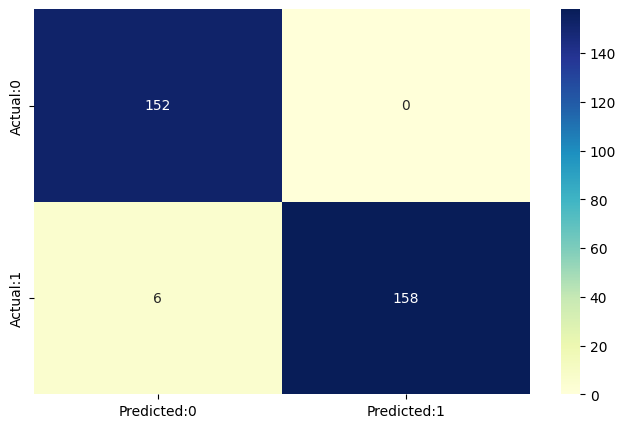

In [114]:
lgbm= lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred1 = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
lgbm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lgbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

#Resultanat Graph with SMOTE

Text(0, 0.5, 'Accuracy')

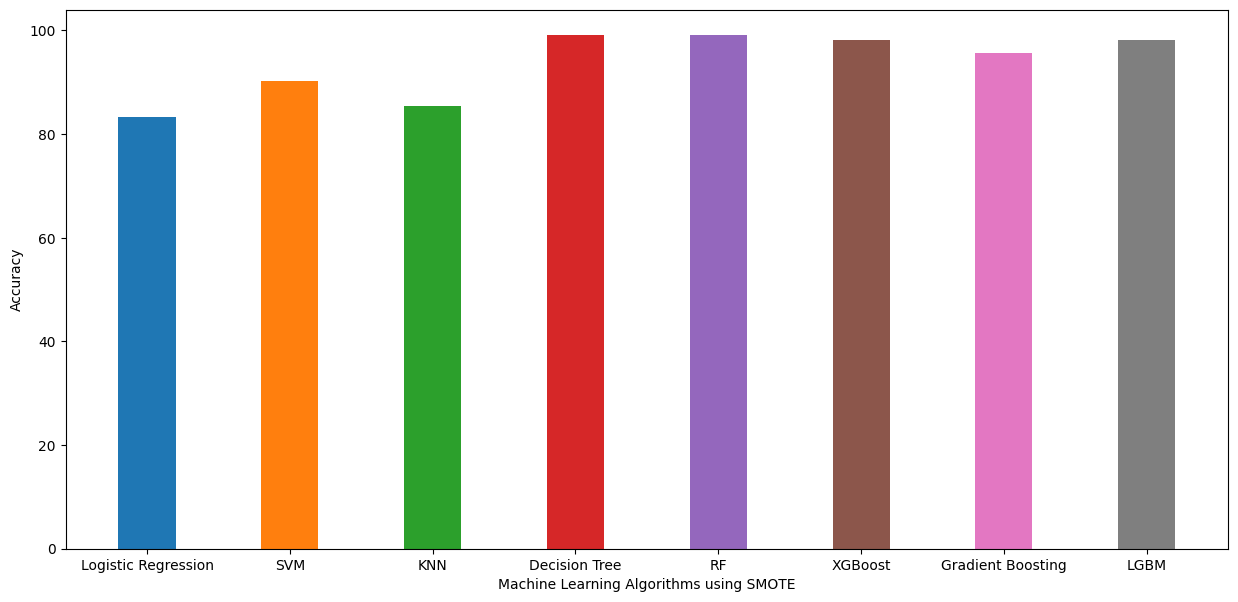

In [115]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')

#**Result Graph Of Both**

Text(0, 0.5, 'Accuracy')

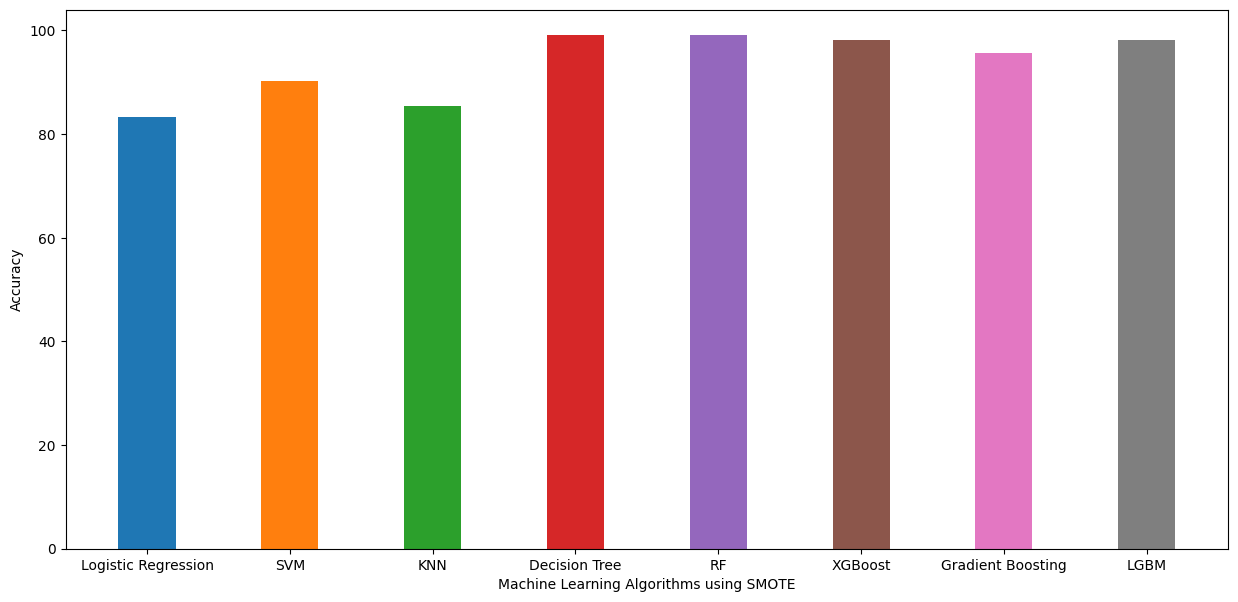

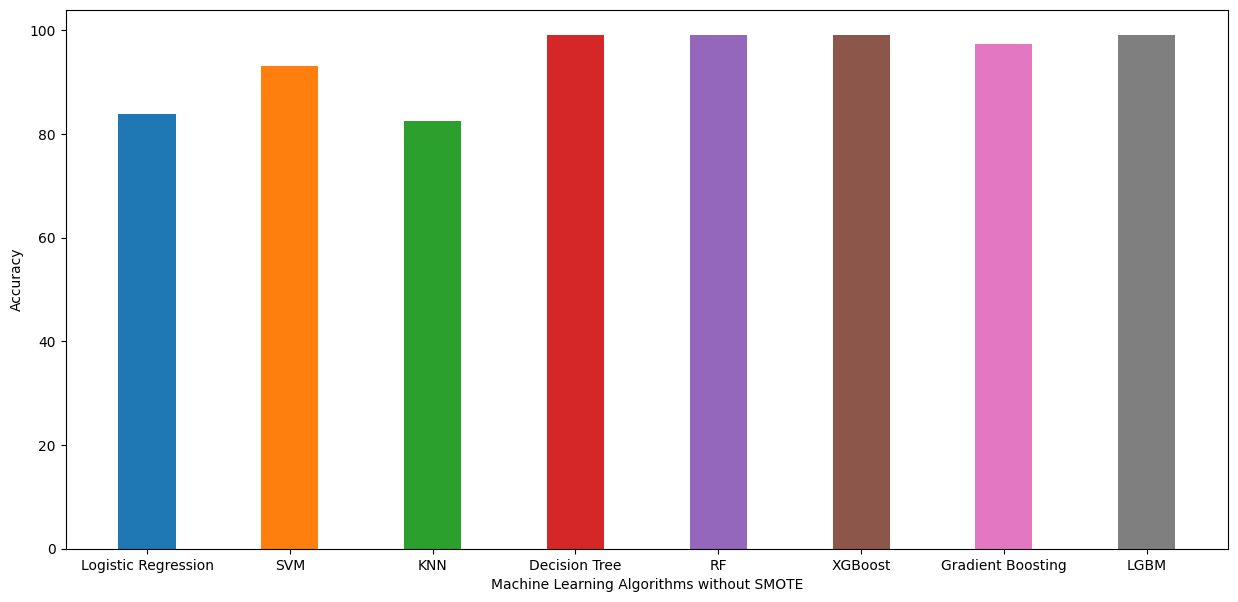

In [116]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')


plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms without SMOTE')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

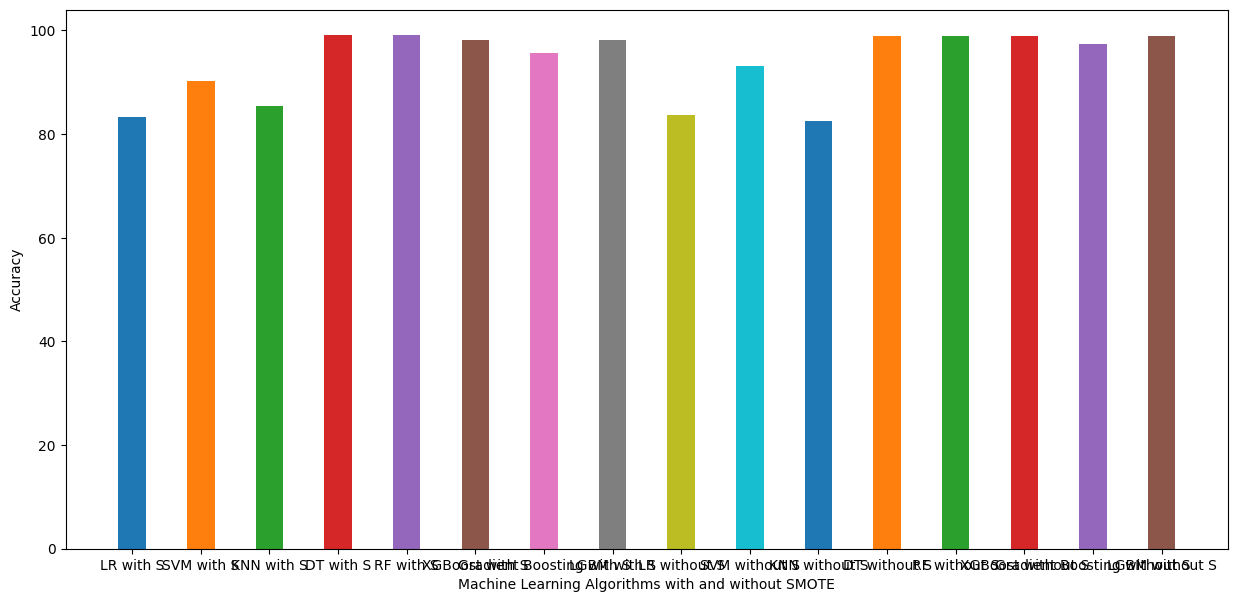

In [117]:
plt.figure(figsize=(15,7))
plt.bar("LR with S", logis_acc1 , width=0.4)
plt.bar("SVM with S", svm_acc1, width=0.4)
plt.bar("KNN with S",knn_acc1,width=0.4)
plt.bar("DT with S", dt_acc1 ,width=0.4)
plt.bar("RF with S", rf_acc1,width=0.4)
plt.bar("XGBoost with S", xg_acc1,width=0.4)
plt.bar("Gradient Boosting with S", gb_acc1,width=0.4)
plt.bar("LGBM with S",lgbm_acc1,width=0.4)
plt.bar("LR without S", logistic_acc, width=0.4)
plt.bar("SVM without S", svm_accu, width=0.4)
plt.bar("KNN without S",knn_accu,width=0.4)
plt.bar("DT without S", tree_accu,width=0.4)
plt.bar("RF without S", rf_accu,width=0.4)
plt.bar("XGBoost without S", xg_accu,width=0.4)
plt.bar("Gradient Boosting without S", gbc_accu,width=0.4)
plt.bar("LGBM without S",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms with and without SMOTE')
plt.ylabel('Accuracy')

#Print Accuracy of All models By using and without usinh SMOTE

In [118]:
print("Logistic Regression", logistic_acc)
print("Logistic Regression with S", logis_acc1 )
print("SVM", svm_accu)
print("SVM with S", svm_acc1)
print("KNN",knn_accu)
print("KNN with S",knn_acc1)
print("Decision Tree", tree_accu)
print("Decision Tree with S", dt_acc1 )
print("Random Forest", rf_accu)
print("Random Forest with S", rf_acc1)
print("XGBoost", xg_accu)
print("XGBoost with S", xg_acc1)
print("Gradient Boosting", gbc_accu)
print("Gradient Boosting with S", gb_acc1)
print("LGBM",gbm_accu)
print("LGBM with S",lgbm_acc1)

Logistic Regression 83.76623376623377
Logistic Regression with S 83.22784810126582
SVM 93.18181818181817
SVM with S 90.18987341772153
KNN 82.46753246753246
KNN with S 85.44303797468355
Decision Tree 99.02597402597402
Decision Tree with S 99.0506329113924
Random Forest 99.02597402597402
Random Forest with S 99.0506329113924
XGBoost 99.02597402597402
XGBoost with S 98.10126582278481
Gradient Boosting 97.40259740259741
Gradient Boosting with S 95.56962025316456
LGBM 99.02597402597402
LGBM with S 98.10126582278481
